In [49]:
#Play a fixed frequency sound.
from __future__ import division
import numpy as np
import pyaudio


import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal
from numpy import pi

from IPython.display import Image  

from scipy.fftpack import fft, fftfreq
from time import time

%matplotlib inline
params = {'legend.fontsize': 16,
          'figure.figsize': (6, 6),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
plt.rcParams.update(params) 



#See http://en.wikipedia.org/wiki/Bit_rate#Audio
BITRATE = 44100 #number of frames per second/frameset.      

#See https://es.wikipedia.org/wiki/Frecuencias_de_afinaci%C3%B3n_del_piano
C8  = 4186.01 

B7  = 3951.07 
Bb7 = 3729.31 
A7  = 3520.00
Ab7 = 3322.44 
G7  = 3135.96 
Gb7 = 2959.96 
F7  = 2793.83 
E7  = 2637.02 
Eb7 = 2489.02 
D7  = 2349.32
Db7 = 2217.46
C7  = 2093.00 

B6  =1975.53 
Bb6 = 1864.66 
A6  = 1760.00
Ab6 = 1661.22
G6  = 1567.98
Gb6 = 1479.98 
F6  = 1396.91 
E6  = 1318.51 
Eb6 = 1244.51 
D6  = 1174.66 
Db6 = 1108.73 
C6  = 1046.50 

B5  = 987.767 
Bb5 = 932.328 
A5  = 880.000
Ab5 = 830.609 
G5  = 783.991 
Gb5 = 739.989 
F5  = 698.456
E5  = 659.255 
Eb5 = 622.254 
D5  = 587.330 
Db5 = 554.365 
C5  = 523.251 

B4   = 493.883 
Bb4  = 466.164
A4   = 440.000 #Hz, (afinacion cuerda guitarra)
Ab4  = 415.305 
G4   = 391.995 
F4   = 349.228 
E4   = 329.628  
Eb4  = 311.127 
D4   = 293.665
Db4  = 277.183 
C4   = 261.626 # (do central)  

B3   = 246.942 

LENGTH = 2 #seconds to play sound

NUMBEROFFRAMES = int(BITRATE * LENGTH)
RESTFRAMES = NUMBEROFFRAMES % BITRATE
WAVEDATA = ''    

#Notas = [A7,A6,A5,A4]
Acorde_C = [C7,E7,G7] 
Acorde_A = [A7,Db7,E7] 


Notas = Acorde_A



for t in range(NUMBEROFFRAMES):
    signal = 0
    for n in Notas:
        signal += np.cos(t/((BITRATE/n)/np.pi/2)) 
    WAVEDATA = WAVEDATA+chr(int(signal*32/len(Notas)+64))    

#fill remainder of frameset with silence
for x in range(RESTFRAMES): 
    WAVEDATA = WAVEDATA+chr(128)

p = pyaudio.PyAudio()
stream = p.open(format = p.get_format_from_width(1), 
            channels = 1, 
            rate = BITRATE, 
            output = True)
stream.write(WAVEDATA)
stream.stop_stream()
stream.close()
p.terminate()

(0, 0.01)

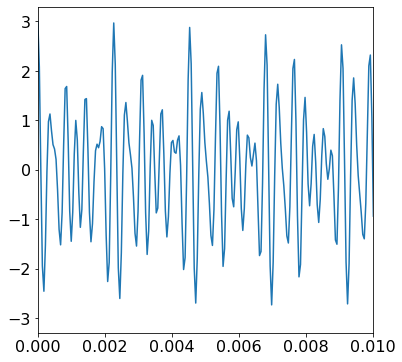

In [50]:
time = np.arange(0, LENGTH, LENGTH/BITRATE )

signal = np.zeros(len(time)) 

for n in Notas:
    signal +=  np.cos(2*np.pi*n*time)
    
plt.plot(time, signal)    
plt.xlim([0,10e-3])

In [51]:
s      = signal[0:int(BITRATE/100)]

S = fft(s)/len(s)  # Normalizada

frq    = fftfreq(len(s), LENGTH/BITRATE )  # Recuperamos las frecuencias

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


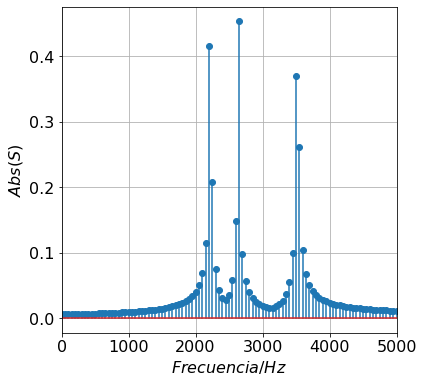

In [52]:
plt.stem(frq, np.abs(S) )  # Representamos la parte imaginaria
plt.xlim(0, 5000)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(S)$')
plt.grid(); plt.show()

In [53]:
LENGTH = 0.2 #seconds to play sound

NUMBEROFFRAMES = int(BITRATE * LENGTH)
RESTFRAMES = NUMBEROFFRAMES % BITRATE
WAVEDATA = '' 


WAVEDATA = '' 

for nota in [C5,C5,C5,F5,A5, C5,C5,C5,F5,A5, F5,F5,E5,E5,D5,D5,C5 ]:
    for t in range(NUMBEROFFRAMES):
        signal = np.cos(t/((BITRATE/nota)/np.pi/2)) 
        WAVEDATA = WAVEDATA+chr(int(signal*32/len(Notas)+64))   
    
    
    
    
    

#fill remainder of frameset with silence
for x in range(RESTFRAMES): 
    WAVEDATA = WAVEDATA+chr(128)

p = pyaudio.PyAudio()
stream = p.open(format = p.get_format_from_width(1), 
            channels = 1, 
            rate = BITRATE, 
            output = True)
stream.write(WAVEDATA)
stream.stop_stream()
stream.close()
p.terminate()

In [56]:
# Mi Sol Sol Sol Fa Mi Sol
# Sol La Fa La do La Sol

LENGTH = 0.2 #seconds to play sound

NUMBEROFFRAMES = int(BITRATE * LENGTH)
RESTFRAMES = NUMBEROFFRAMES % BITRATE
WAVEDATA = '' 


WAVEDATA = '' 

for nota in [E4,G4,G4,F4,E4,G4, G4,A4,F4,A4,C4,A4,G4 ]:
    for t in range(NUMBEROFFRAMES):
        signal = np.cos(t/((BITRATE/nota)/np.pi/2)) 
        WAVEDATA = WAVEDATA+chr(int(signal*64/len(Notas)+64))   
    
    
    
    
    

#fill remainder of frameset with silence
for x in range(RESTFRAMES): 
    WAVEDATA = WAVEDATA+chr(128)

p = pyaudio.PyAudio()
stream = p.open(format = p.get_format_from_width(1), 
            channels = 1, 
            rate = BITRATE, 
            output = True)
stream.write(WAVEDATA)
stream.stop_stream()
stream.close()
p.terminate()